# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
blobs_data = np.array(pd.read_csv("../Datasets/blobs2.csv"))

In [3]:
def divide_xy(data):
    x_data = data[:, 0:-1]
    y_data = data[:, -1]
    return (x_data, y_data)

In [4]:
blobs_x, blobs_y = divide_xy(blobs_data)

In [18]:
from sklearn.svm import SVC

def random_color():
    return np.random.rand(3,)

def draw_classification(data_x, data_y, model):
    x_min = min([x[0] for x in data_x]) - 1
    x_max = max([x[0] for x in data_x]) + 1
    y_min = min([x[1] for x in data_x]) - 1
    y_max = max([x[1] for x in data_x]) + 1
    
    xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    
    zs = xs.copy()
    
    for i in range(xs.shape[0]):
        for j in range(xs.shape[1]):
            p = np.array([xs[i][j], ys[i][j]])
            zs[i][j] = model.predict([p])[0]
    
    plt.contourf(xs, ys, zs, colors=[random_color(), random_color(), random_color(), random_color()])
    
    for t in [0, 1]:
        xs = []
        ys = []
        
        xs_support = []
        ys_support = []
        
        for i in range(len(data_y)):
            if (data_y[i] == t):
                if (i in model.support_):
                    xs_support.append(data_x[i][0])
                    ys_support.append(data_x[i][1])
                else:
                    xs.append(data_x[i][0])
                    ys.append(data_x[i][1])
        
        plt.plot(xs, ys, marker='o', color=np.random.rand(3,), ls='')
        plt.plot(xs_support, ys_support, marker='o', color=np.random.rand(3,), ls='')
    
    plt.show()
    
    plt.close()

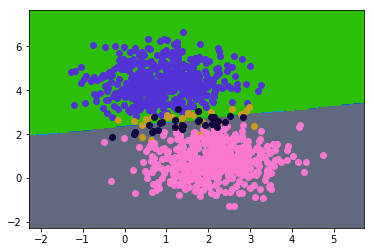

In [19]:
model = SVC(kernel='linear', gamma='auto')
model.fit(blobs_x, blobs_y)
draw_classification(blobs_x, blobs_y, model)

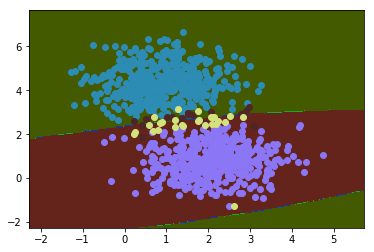

In [21]:
model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(blobs_x, blobs_y)
draw_classification(blobs_x, blobs_y, model)

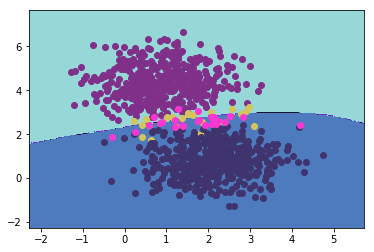

In [22]:
model = SVC(kernel='poly', degree=3, gamma='auto')
model.fit(blobs_x, blobs_y)
draw_classification(blobs_x, blobs_y, model)

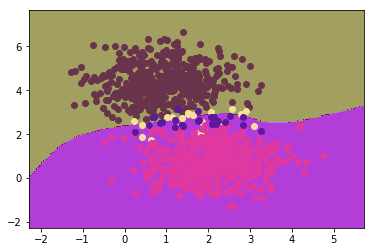

In [28]:
model = SVC(kernel='poly', degree=5, gamma='auto')
model.fit(blobs_x, blobs_y)
draw_classification(blobs_x, blobs_y, model)

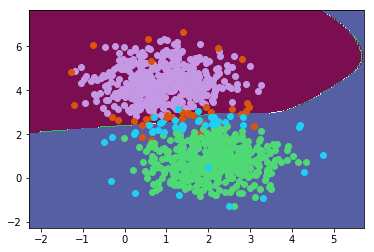

In [29]:
model = SVC(kernel='rbf', gamma='auto')
model.fit(blobs_x, blobs_y)
draw_classification(blobs_x, blobs_y, model)

The best result is acquired by polynomial functions of odd degrees (1, 3, 5)

# Task 2

In [54]:
spam_data = np.array(pd.read_csv("../Datasets/spam.csv"))

cancer_data = np.array(pd.read_csv("../Datasets/cancer.csv"))

for i in range(len(cancer_data)):
    label = cancer_data[i][0]
    for j in range(1, len(cancer_data[i])):
        cancer_data[i][j - 1] = cancer_data[i][j]
    cancer_data[i][-1] = 0 if (label == 'B') else 1

In [56]:
def scale_min_max(data):
    data = data.copy()
    features = data.shape[1]
    
    for j in range(features):
        mn = min([data[i][j] for i in range(len(data))])
        mx = max([data[i][j] for i in range(len(data))])
        for i in range(len(data)):
            data[i][j] = (data[i][j] - mn) / (mx - mn)
    return data

def fix_y(y):
    for i in range(len(y)):
        if (y[i] == -1):
            y[i] = 0
    return y.astype('int')  

spam_x, spam_y = divide_xy(spam_data)
cancer_x, cancer_y = divide_xy(cancer_data)

spam_x = scale_min_max(spam_x)
cancer_x = scale_min_max(cancer_x)
spam_y = fix_y(spam_y)
cancer_y = fix_y(cancer_y)

In [57]:
from sklearn.model_selection import train_test_split
spam_train_x, spam_valid_x, spam_train_y, spam_valid_y = train_test_split(spam_x, spam_y, test_size=0.2)
cancer_train_x, cancer_valid_x, cancer_train_y, cancer_valid_y = \
    train_test_split(cancer_x, cancer_y, test_size=0.2)

In [71]:
import time

def timeit(code):
    start = time.time()
    code()
    return time.time() - start

def run(model, train_x, train_y, valid_x, valid_y):
    def fit_model():
        model.fit(train_x, train_y)
        
    time = timeit(fit_model)
    
    predict_y = model.predict(valid_x)
    return (np.mean([valid_y[i] == predict_y[i] for i in range(len(valid_y))]), time)

In [72]:
def run_svc(train_x, train_y, valid_x, valid_y, degree):
    return run(SVC(kernel='poly', degree=degree, gamma='auto'), train_x, train_y, valid_x, valid_y)

In [73]:
from sklearn.ensemble import RandomForestClassifier

def run_random_forest(train_x, train_y, valid_x, valid_y, trees):
    return run(RandomForestClassifier(n_estimators=trees), train_x, train_y, valid_x, valid_y)

In [81]:
def show_results(p):
    acc, time = p
    
    print("Accuracy: " + str(acc))
    print("Time: " + str(time))
print("Cancer data:")
print("SVM with degree=1:")
show_results(run_svc(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y, 1))

Cancer data:
SVM with degree=1:
Accuracy: 0.9649122807017544
Time: 0.010497331619262695


In [82]:
print("Cancer data:")
print("SVM with degree=2:")
show_results(run_svc(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y, 2))

Cancer data:
SVM with degree=2:
Accuracy: 0.868421052631579
Time: 0.016333341598510742


In [83]:
print("Cancer data:")
print("SVM with degree=3:")
show_results(run_svc(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y, 3))

Cancer data:
SVM with degree=3:
Accuracy: 0.7192982456140351
Time: 0.011306047439575195


In [84]:
print("Cancer data:")
print("Random forest with 1 tree:")
show_results(run_random_forest(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y, 1))

Cancer data:
Random forest with 1 tree:
Accuracy: 0.9473684210526315
Time: 0.0037462711334228516


In [90]:
print("Cancer data:")
print("Random forest with 100 trees:")
show_results(run_random_forest(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y, 100))

Cancer data:
Random forest with 100 trees:
Accuracy: 0.9736842105263158
Time: 0.1320352554321289


In [86]:
print("Spam data:")
print("SVM with degree=1:")
show_results(run_svc(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y, 1))

Spam data:
SVM with degree=1:
Accuracy: 0.6818675352877307
Time: 0.9190537929534912


In [88]:
print("Spam data:")
print("SVM with degree=2:")
show_results(run_svc(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y, 2))

Spam data:
SVM with degree=2:
Accuracy: 0.6145494028230185
Time: 0.8784685134887695


In [89]:
print("Spam data:")
print("SVM with degree=3:")
show_results(run_svc(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y, 3))

Spam data:
SVM with degree=3:
Accuracy: 0.6145494028230185
Time: 0.8855860233306885


In [91]:
print("Spam data:")
print("Random forest with 1 tree:")
show_results(run_random_forest(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y, 1))

Spam data:
Random forest with 1 tree:
Accuracy: 0.8751357220412594
Time: 0.04139232635498047


In [104]:
print("Spam data:")
print("Random forest with 100 trees:")
show_results(run_random_forest(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y, 100))

Spam data:
Random forest with 100 trees:
Accuracy: 0.9554831704668838
Time: 0.5341479778289795


SVM shows quite bad accuracy on these datasets in comparison with Random Forest.

# Task 3

In [217]:
def log_conditional_probability(x, mu, sigma2):
    return -(x- mu)**2 / (2 * sigma2) - np.log(2 * np.pi * sigma2) / 2

def extract_x(data_x, data_y, label, column):
    xs = []
    for i in range(len(data_x)):
        if (data_y[i] == label):
            xs.append(data_x[i][column])
    return np.array(xs)   


def predict(x, data_x, data_y):
    log_probabilities = []
    
    for l in [0, 1]:
        log_probability = 0.0 # log(1.0) == 0 
        
        for i in range(data_x.shape[1]):
            xs = extract_x(data_x, data_y, l, i)
            mu = xs.mean()
            sigma2 = xs.var()
            log_probability += log_conditional_probability(x[i], mu, sigma2)
        
        # class probability
        log_probability += np.log(np.array([data_y[i] == l for i in range(len(data_x))]).mean())
        
        log_probabilities.append(log_probability)
    return log_probabilities

def calc_log_probabilities(train_x, train_y, valid_x):
    result = []
    for i in range(len(valid_x)):
        result.append(predict(valid_x[i], train_x, train_y))
    return result    

def calc_accuracy(train_x, train_y, valid_x, valid_y):
    predictions = []
    probabilities = calc_log_probabilities(train_x, train_y, valid_x)
    for i in range(len(valid_x)):
        prs = probabilities[i]
        predictions.append(0 if (prs[0] > prs[1]) else 1)
    return  np.array([valid_y[i] == predictions[i] for i in range(len(valid_y))]).mean()

In [107]:
print("Cancer data")
print("Accuracy: " + str(calc_accuracy(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y)))

Cancer data
Accuracy: 0.9473684210526315


In [103]:
print("Spam data")
print("Accuracy: " + str(calc_accuracy(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y)))

Spam data
Accuracy: 0.8056460369163952


In [222]:
def bound(x):
    if (x < -20):
        return -20
    if (x > 20):
        return 20
    return x

def get_first_class_probability(log_probabilities):
    p0 = bound(log_probabilities[0])
    p1 = bound(log_probabilities[1])
    
    p0 = np.exp(p0)
    p1 = np.exp(p1)
    return p1 / (p0 + p1)
    
def draw_curve(points):
    points.sort(key = lambda p: p[0])
    plt.close()
    
    plt.plot([x[0] for x in points], [x[1] for x in points])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
    
def calc_first_class_probabilities(train_x, train_y, valid_x, valid_y):
    prs = calc_log_probabilities(train_x, train_y, valid_x)
    result = []
    for i in range(len(prs)):
        result.append((get_first_class_probability(prs[i]), valid_y[i]))
        
    return result

def get_auc_points(fc_probabilities):
    fc_probabilities.sort(key = lambda x: -x[0])
    
    current_point = [0, 0]
    
    positive = 0
    negative = 0
    
    for x in fc_probabilities:
        if (x[1] == 1):
            positive = positive + 1
        else:
            negative = negative + 1
        
    points = []    
        
    for x in fc_probabilities:
        if (x[1] == 1):
            current_point[1] = current_point[1] + 1.0 / positive
        else:
            current_point[0] = current_point[0] + 1.0 / negative

        points.append(current_point.copy())
        
    return points    

Cancer data


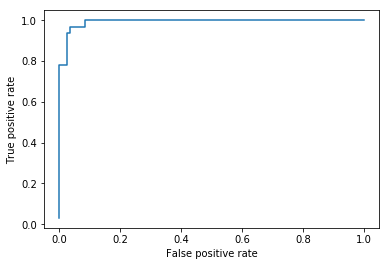

In [223]:
print("Cancer data")
draw_curve(get_auc_points(calc_first_class_probabilities(cancer_train_x, cancer_train_y, cancer_valid_x, cancer_valid_y)))

Spam data


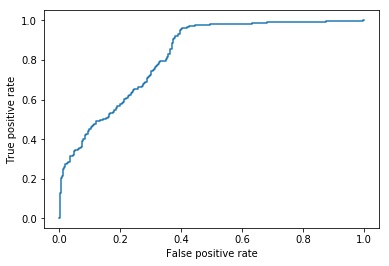

In [120]:
print("Spam data")
draw_curve(get_auc_points(calc_first_class_probabilities(spam_train_x, spam_train_y, spam_valid_x, spam_valid_y)))

# Task 4

In [129]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

In [124]:
smsspam_data = np.array(pd.read_csv("../Datasets/smsspam.csv"))

for i in range(len(smsspam_data)):
    label = smsspam_data[i][0]
    for j in range(1, len(smsspam_data[i])):
        smsspam_data[i][j - 1] = smsspam_data[i][j]
    smsspam_data[i][-1] = 1 if (label == 'spam') else 0

In [134]:
smsspam_x, smsspam_y = divide_xy(smsspam_data)

smsspam_x = smsspam_x.reshape(len(smsspam_x))

smsspam_train_x, smsspam_valid_x, smsspam_train_y, smsspam_valid_y = \
    train_test_split(smsspam_x, smsspam_y, test_size=0.2)

In [226]:
stemmer = PorterStemmer()

def get_words(text):
    words = word_tokenize(text)
    words = filter(lambda s: s.isalpha(), words)
    words = map(lambda s: s.lower(), words)
    
    return words

def get_all_words(data_x, threshold=0):
    words = set()
    for x in data_x:
        for word in get_words(x):
            words.add(word)
    
    cnt = {}        
            
    for x in data_x:
        for word in get_words(x):
            cnt[word] = cnt.get(word, 0) + 1
   
    result = set()
    
    for word in words:
        if (cnt[word] >= threshold): # get rid of random words
            result.add(word)
    
    return result
            
def text_to_cnt(text, all_words):
    words = get_words(text)
    
    cnt = { word : 0 for word in all_words}
    
    for word in words:
        if (word in all_words):
            cnt[word] = cnt[word] + 1
    return cnt

smsspam_words = get_all_words(smsspam_x)

def statistics(train_x, all_words):
    stats = { word : {} for word in all_words }
    
    for x in train_x:
        cnt = text_to_cnt(x, all_words)
        for (word, count) in cnt.items():
            stats[word][count] = stats[word].get(count, 0) + 1
    return stats
     
def calc_frequency(word, stats, rev):
    total = sum([stats[word][key] for key in stats[word]])
    cnt = total - stats[word].get(0, 0)
    if (rev):
        return (total - cnt + 1) / (total + 1)
    else:
        return (cnt + 1) / (total + 1)

def extract_x(data_x, data_y, label):
    xs = []
    for i in range(len(data_x)):
        if (data_y[i] == label):
            xs.append(data_x[i])
    return np.array(xs)  
    
    
def predict(xs, train_x, train_y, all_words):
    log_probabilities = np.array([[0.0] * 2] * len(xs))
        
    full_stats = statistics(train_x, all_words)
    
    for l in [0, 1]:
        data_x = extract_x(train_x, train_y, l)
    
        stats = statistics(data_x, all_words)
    
        for i in range(len(xs)):
            x = xs[i]
            log_probability = np.log(len(data_x) / len(train_x))
        
            cnt = text_to_cnt(x, all_words)
        
            for word, count in cnt.items():
                log_probability += count * np.log(calc_frequency(word, stats, count == 0))
            log_probabilities[i][l] = log_probability 
    return log_probabilities

def get_first_class_probability(log_probabilities):
    p0 = log_probabilities[0]
    p1 = log_probabilities[1]
    
    p0 = np.exp(p0)
    p1 = np.exp(p1)
    return p1 / (p0 + p1)

def calc_first_class_probabilities(train_x, train_y, valid_x, valid_y, all_words):
    
    prs = predict(valid_x, train_x, train_y, all_words)
    
    result = []
    
    for i in range(len(prs)):
        result.append((get_first_class_probability(prs[i]), valid_y[i]))
        
    return result   

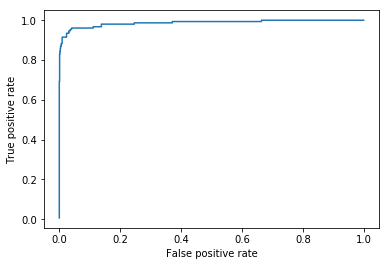

In [227]:
draw_curve(get_auc_points(calc_first_class_probabilities(smsspam_train_x, smsspam_train_y, smsspam_valid_x, smsspam_valid_y, smsspam_words)))